# Testing Fourier 2D integration using dummy data

In [1]:
import pixstem.api as ps
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def fourier(image):
    ft = np.fft.ifftshift(image)
    ft = np.fft.fft2(ft)
    ft = np.fft.fftshift(ft)
    
    freq_x = np.fft.fftfreq(ft.shape[0])
    freq_y = np.fft.fftfreq(ft.shape[1])
    freq_x = np.fft.fftshift(freq_x)
    freq_y = np.fft.fftshift(freq_y)

    plt.imshow(np.abs(ft), extent=(freq_x.min(),freq_x.max(),freq_y.min(),freq_y.max()))
    plt.colorbar()
    plt.xlabel('k')
    plt.ylabel('l')
    plt.show()
               
    return ft, (freq_x, freq_y)


def inv_fourier(ft):
    ift = np.fft.ifftshift(ft)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)

    return ift


def test_fourier_integration(dpc_lr, dpc_ud):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    mp = axs[0].imshow(dpc_lr, cmap='gray')
    plt.colorbar(mp, ax=axs[0])
    mp = axs[1].imshow(dpc_ud, cmap='gray')
    plt.colorbar(mp, ax=axs[1])
    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    mp = axs[0].imshow(np.cumsum(dpc_lr, axis=1))
    plt.colorbar(mp, ax=axs[0])
    mp = axs[1].imshow(np.cumsum(dpc_ud, axis=0))
    plt.colorbar(mp, ax=axs[1])
    plt.tight_layout()
    plt.show()

    phi_x = dpc_lr
    phi_y = dpc_ud

    g = phi_x + (1j * phi_y)
    plt.imshow(np.abs(g))
    plt.title('| g(x,y) |')
    plt.colorbar()
    plt.show()

    ft_g, (freq_x, freq_y) = fourier(g)

    freq_xx, freq_yy = np.meshgrid(freq_x, freq_y, indexing='ij')
    denom = ((2. * np.pi * 1.0j) * (freq_xx + (1.0j * freq_yy))) + 1e-16

    phi = inv_fourier(ft_g / denom)
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    mp = axs[0].imshow(np.real(phi))
    plt.colorbar(mp, ax=axs[0])
    axs[0].set_title(r'$\Re{(\Phi)}$')
    mp = axs[1].imshow(np.imag(phi))
    plt.colorbar(mp, ax=axs[1])
    axs[1].set_title(r'$\Im{(\Phi)}$')
    mp = axs[2].imshow(np.abs(phi))
    plt.colorbar(mp, ax=axs[2])
    axs[2].set_title(r'$|\Phi|}$')
    plt.tight_layout()
    plt.show()

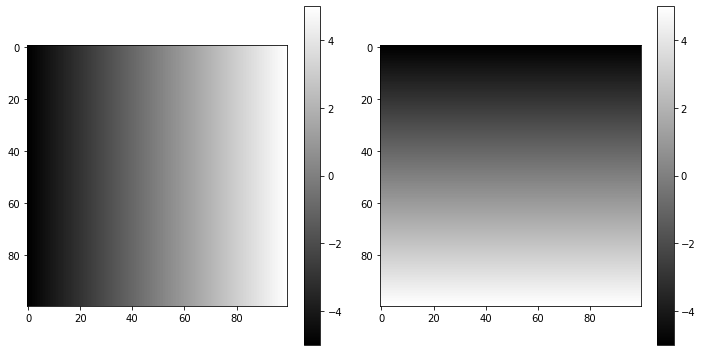

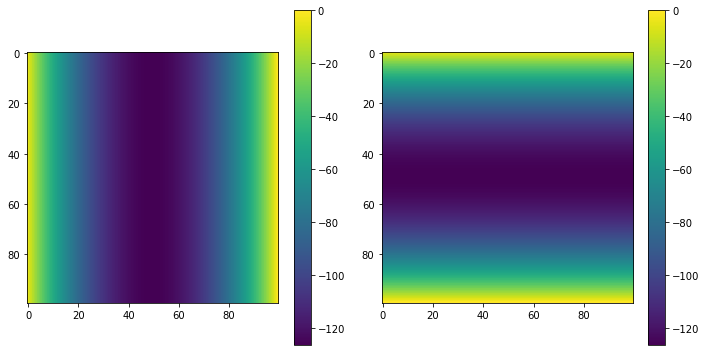

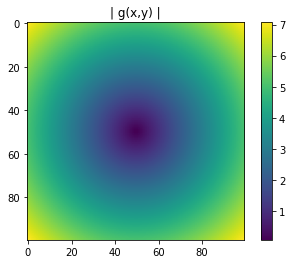

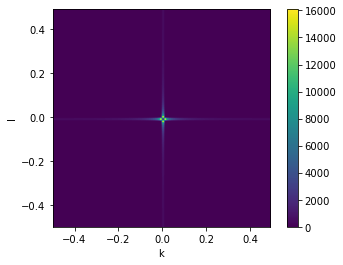

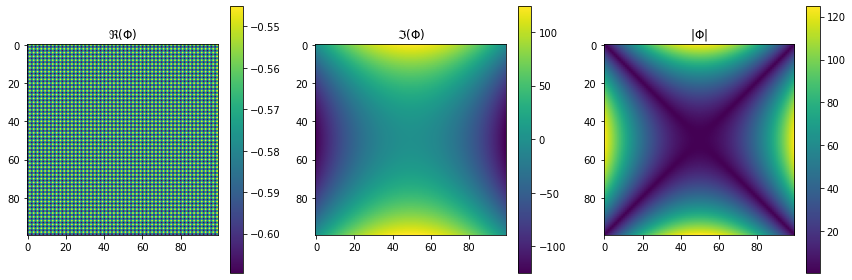

In [3]:
s = ps.dummy_data.get_simple_dpc_signal()
test_fourier_integration(s.data[1], s.data[0])

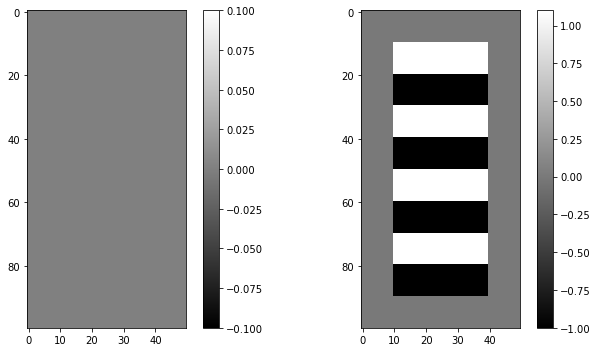

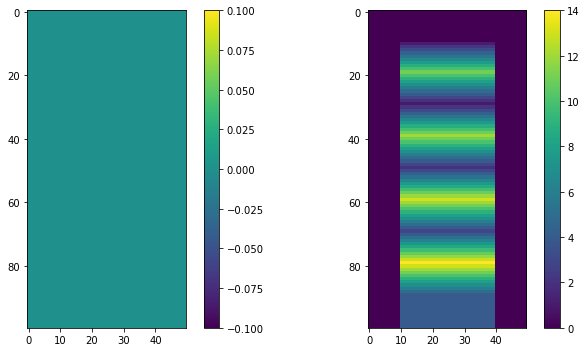

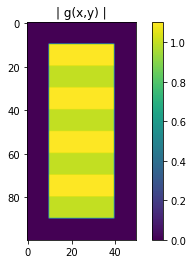

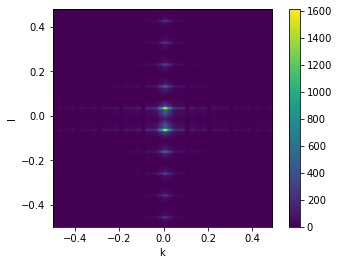

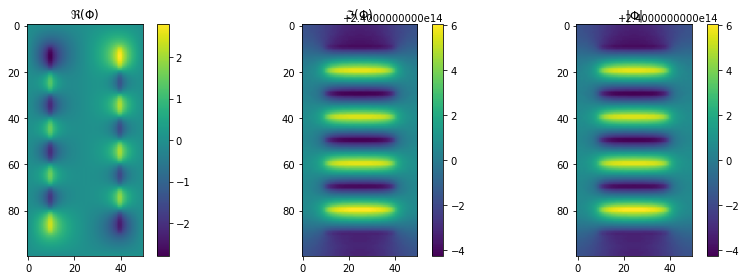

In [4]:
s = ps.dummy_data.get_stripe_pattern_dpc_signal()
test_fourier_integration(s.data[1], s.data[0])

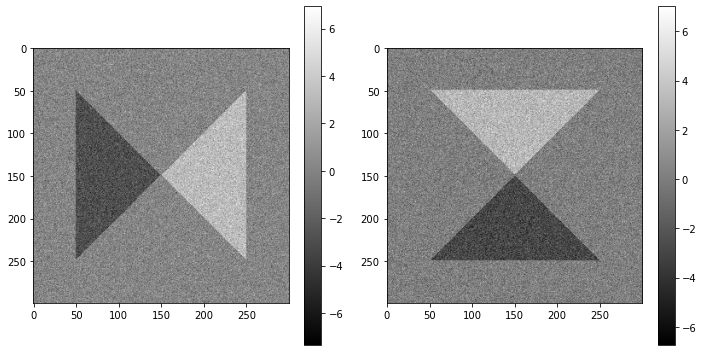

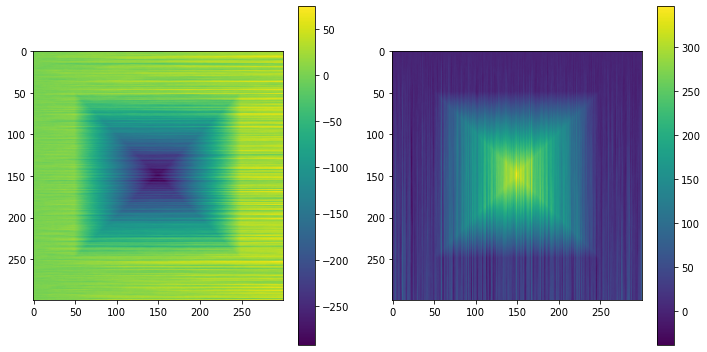

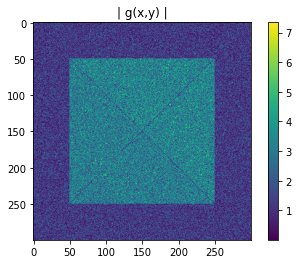

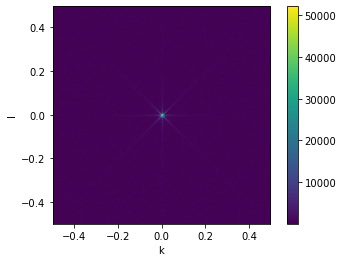

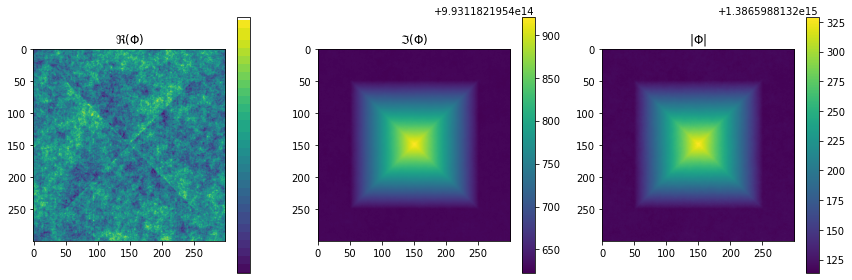

In [5]:
s = ps.dummy_data.get_square_dpc_signal()
test_fourier_integration(s.data[1], s.data[0])

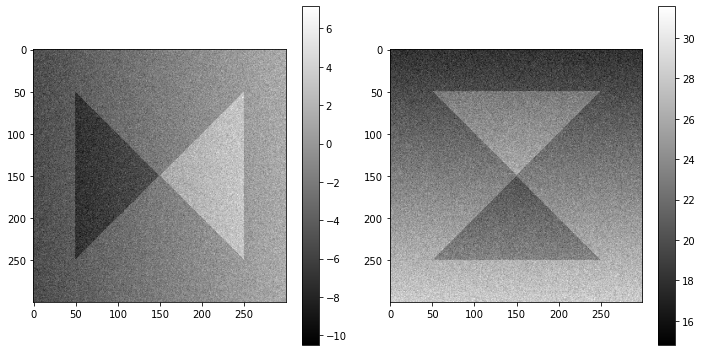

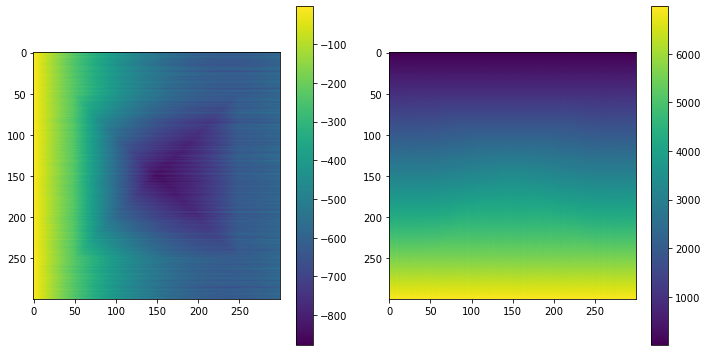

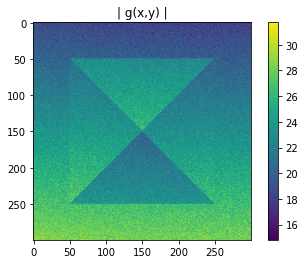

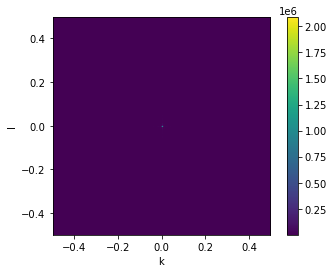

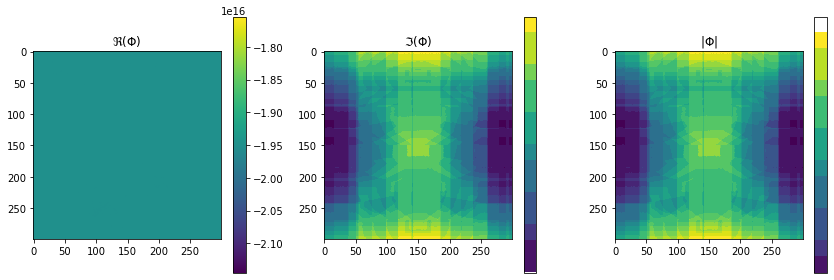

In [6]:
s = ps.dummy_data.get_square_dpc_signal(add_ramp=True)
test_fourier_integration(s.data[1], s.data[0])